<a href="https://colab.research.google.com/github/venkat2ram/tf_cert_practice/blob/main/Fashoin_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
import math as math

In [3]:
dataset,meta_data=tfds.load('fashion_mnist',with_info=True,as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteV3LOPM/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteV3LOPM/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
train_data=dataset['train']
test_data=dataset['test']

In [5]:
num_train_data=meta_data.splits['train'].num_examples
num_test_data=meta_data.splits['test'].num_examples

In [6]:
meta_data

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [7]:
def normalize(image,label):
  image=tf.cast(image,tf.float32)
  image=image/255
  return image,label

In [8]:
train_data=train_data.map(normalize)
test_data=test_data.map(normalize)

In [9]:
for image,label in train_data.take(1):
  break

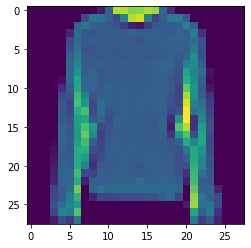

In [10]:
plt.imshow(image.numpy().reshape(28,28))

In [11]:
BATCH_SIZE=32
train_data=train_data.cache().repeat().shuffle(num_train_data).batch(BATCH_SIZE)
test_data=test_data.cache().batch(BATCH_SIZE)

In [35]:
model=tf.keras.models.Sequential([
    #tf.keras.layers.Conv2D(8,2,(2,2),padding='valid'),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')]
)

In [36]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics='accuracy')

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [38]:
history=model.fit(train_data,epochs=15,steps_per_epoch=math.ceil(num_train_data/BATCH_SIZE),validation_data=test_data)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4967 - accuracy: 0.8270 - val_loss: 0.4325 - val_accuracy: 0.8491
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8658 - val_loss: 0.3867 - val_accuracy: 0.8602
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3401 - accuracy: 0.8768 - val_loss: 0.3756 - val_accuracy: 0.8679
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8852 - val_loss: 0.3806 - val_accuracy: 0.8606
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2919 - accuracy: 0.8933 - val_loss: 0.3723 - val_accuracy: 0.8631
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2828 - accuracy: 0.8958 - val_loss: 0.3669 - val_accuracy: 0.8700
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.9001 - val_loss: 0.3415 - val_accuracy:

In [16]:
class_names=meta_data.features['label'].names

In [17]:
for im,la in test_data.take(1):
  break;

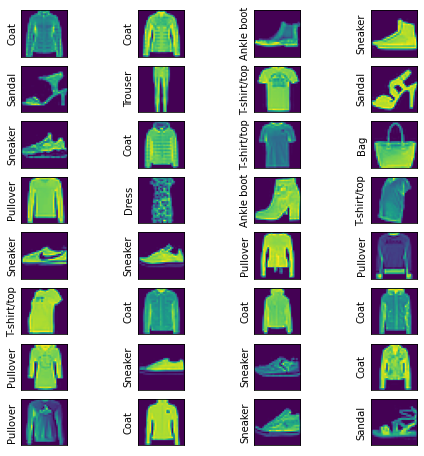

In [18]:
plt.figure(figsize=(8,8))
for a in range(32):
  x=im[a].numpy().reshape(28,28)
  plt.subplot(8,4,a+1)
  plt.xticks([])
  plt.yticks([])
  plt.ylabel(class_names[la.numpy()[a]])
  plt.grid(False)
  plt.imshow(x)

In [19]:
la1=model.predict(im)

In [20]:
la1=la1.argmax(axis=1)

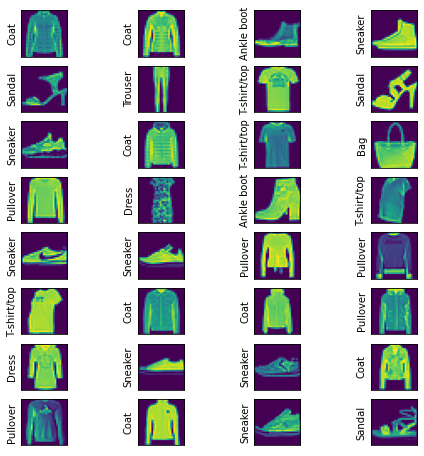

In [21]:
plt.figure(figsize=(8,8))
for a in range(32):
  x=im[a].numpy().reshape(28,28)
  plt.subplot(8,4,a+1)
  plt.xticks([])
  plt.yticks([])
  plt.ylabel(class_names[la1[a]])
  plt.grid(False)
  plt.imshow(x)

In [22]:
history.history

{'accuracy': [0.824916660785675,
  0.8610666394233704,
  0.8752666711807251,
  0.887333333492279,
  0.8905500173568726,
  0.8963500261306763,
  0.8997666835784912,
  0.9039499759674072,
  0.9067000150680542,
  0.9112499952316284,
  0.913433313369751,
  0.9157166481018066,
  0.9194333553314209,
  0.9204999804496765,
  0.9237666726112366],
 'loss': [0.4897407293319702,
  0.3812214434146881,
  0.33941611647605896,
  0.31102561950683594,
  0.29387304186820984,
  0.2816002070903778,
  0.26917392015457153,
  0.2589311897754669,
  0.2489318698644638,
  0.24153664708137512,
  0.23034308850765228,
  0.22628024220466614,
  0.21415019035339355,
  0.21212273836135864,
  0.20320025086402893],
 'val_accuracy': [0.8331999778747559,
  0.8569999933242798,
  0.8729000091552734,
  0.8756999969482422,
  0.8705999851226807,
  0.8788999915122986,
  0.8766000270843506,
  0.883899986743927,
  0.8845999836921692,
  0.8715000152587891,
  0.8845999836921692,
  0.886900007724762,
  0.8761000037193298,
  0.8812000

In [23]:
train_accuracy=history.history['accuracy']
train_loss=history.history['loss']
val_accuracy=history.history['val_accuracy']
val_loss=history.history['val_loss']

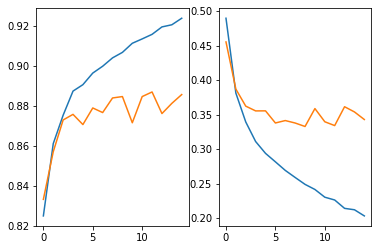

In [24]:
plt.subplot(1,2,1)
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.subplot(1,2,2)
plt.plot(train_loss)
plt.plot(val_loss)